In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

In [ ]:
county_data = pd.read_csv("us-counties.csv")
state_data = pd.read_csv("us-states.csv")

In [ ]:
##covid_deaths, cases use the same functions (sort, range, display) but will pass different arguments
#def md_data():

#STATE
def state(state_data):
  #displays data on covid cases or deaths by state
  md_state_df = state_data.loc[state_data["state"] == 'Maryland']

  md_state_df = md_state_df.reset_index(drop=True)

  selection = input("Cases or Deaths?: ")
  if 'cases' in selection:
    cases(md_state_df)
  elif 'deaths' in selection:
    deaths(md_state_df)


#COUNTY
def county(county_data):
  #displays data on covid cases or deaths by county
  
  #md_counties_df is all data from county_data that is from Maryland
  md_counties_df = county_data.loc[county_data["state"] == 'Maryland']

  #User types in desired county, loop to ensure that the user is entering a county that exists
  county_list = md_counties_df["county"].tolist()
  selection = input("Would you like to see a list of counties? (yes/no")
  selection.lower()
  if selection == 'yes':
    for county in county_list:
      print(county)
  #list of counties in Maryland
  check = 0
  county = ''
  while check == 0:
    county = input("Type the county you want: ")
    county.lower()
    county.capitalize()
    if county in county_list:
      check = 1
    else:
      print(county + " is not a county in Maryland, please enter a county in Maryland: ")
  
  #Now that we have a correct county, create new dataframe that only includes data from desired county
  md_county_df= md_counties_df.loc[md_counties_df["county"] == county]
  md_county_df = md_county_df.reset_index(drop=True)
  selection = input("Cases or Deaths?")
  selection.lower()
  if 'cases' in selection:
    cases(md_county_df)
  elif 'deaths' in selection:
    deaths(md_county_df)


def cases(df):
  range_df = set_range(df)
  #print(range_df.head())
  display(range_df, "cases")

def deaths(df):
  range_df = set_range(df)
  #print(range_df.head())
  display(range_df, "deaths")

def set_range(df):
  #this function creates a new dataframe that only includes data from the range the user wants to observe
  selection = input("Do you want a defined ranged or do you just want the full data? (type full for full data, anything else for defined range): ")
  selection.lower()
  if selection == 'full':
    return df
  date_list = df["date"].tolist()
  
  #get starting date
  check = 0
  start_date = ''
  while check != 1:
    start_date = input("Enter start date (YYYY-MM-DD): ")
    if start_date in date_list:
      check = 1
    else:
      print("Either that date doesn't exist in the data or incorrect format")

  
  #get end date
  check = 0
  end_date = ''
  while check != 1:
    end_date = input("Enter end date (YYYY-MM-DD): ")
    if end_date in date_list or end_date < start_date:
      check = 1
    else:
      print("Either that date doesn't exist in the data, incorrect format, or end date is earlier than start date")
  

  #create new dataframe within the dates user requested
  user_range = (df['date'] > start_date) & (df['date'] <= end_date)

  user_range_df = df.loc[user_range]

  user_range_df = user_range_df.reset_index(drop=True)



  return user_range_df
  #set the range for matplot graphs via user input 

def display(df, option):
  #takes values from set_range() and plots them visually using desired format (histogram, pie chart, etc)
  
  #option variable has either "cases" or "deaths" stored, so when you need to create the graph, just do df[option]

  #for the title: determine if this is state or county
  desc = ''
  if 'county' in df.columns:
      county_list = df["county"].tolist()
      desc = " for " + county_list[0] + " county"
  else:
    desc =  " in Maryland"
      
  


  #Pandas and matplotlib has a lot of functionality with dates, so I did this to have pandas recongnize it is working with dates. This is neccessary for the x ticks formating
  df['date'] = pd.to_datetime(df['date'])
  df.sort_values('date', inplace=True)
  dates = df['date']
  cd = df[option]
  formated_dates = mpl_dates.DateFormatter('%b, %d')
  
  #user chooses which graph they would like, then displays graph
  selection = int(input("Choose the corresponding number for how you want the data to be displayed:\n1 - Line graph\n2 - Bar graph\n3 - Scatterplot (not recommended for more than a month of data)\n"))
  if selection == 1:
    plt.plot_date(dates, cd, linestyle = 'solid', marker='None')
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(formated_dates)
    plt.title("COVID-19 " + option.capitalize() + desc)
    plt.xlabel("Date recorded")
    plt.ylabel(option.capitalize())
  elif selection == 2:
    plt.bar(df['date'], df[option])
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(formated_dates)
    plt.title("COVID-19 " + option.capitalize() +  desc)
    plt.xlabel("Date recorded")
    plt.ylabel(option.capitalize())
  elif selection == 3:
    plt.scatter(df['date'], df[option])
    plt.gcf().autofmt_xdate()
    plt.gca().xaxis.set_major_formatter(formated_dates)
    plt.title("COVID-19 " + option.capitalize() + desc)
    plt.xlabel("Date recorded")
    plt.ylabel(option.capitalize())
  
  selection = input("Would you like to view deaths as well? (yes/no): ")
  selection.lower()


  #plt.hist(df[option], bins=100, range=(set_range(df)))
  #plt.gcf().autofmt_xdate()

  #plt.pie(df['deaths'].value_counts(), labels= df['deaths'].value_counts().index, autopct="%2.2f%%")

  #plt.title('COVID outcome over user selected range')
  #
  #
  #plt.show()
  


  #takes values from set_range() and plots them visually using desired format (histogram, pie chart, etc)

Please select a function: Maryland State Data, Maryland County Data (state, county): state
Cases or Deaths?: cases
Do you want a defined ranged or do you just want the full data? (type full for full data, anything else for defined range): full
Choose the corresponding number for how you want the data to be displayed:
1 - Line graph
2 - Bar graph
3 - Scatterplot (not recommended for more than a month of data)
1


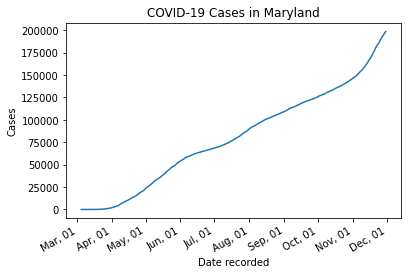

test
Would you like to view deaths as well? (yes/no): yes


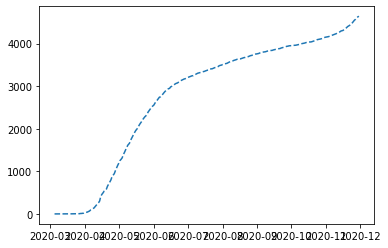

In [ ]:
selection = input("Please select a function: Maryland State Data, Maryland County Data (state, county): ")
selection = selection.lower()
if 'state' in selection:
  state(state_data)
elif 'county' in selection:
  county(county_data)
else:
  print("Invalid Selection")